избранное:

resolveDualStackLocalDetectors, testExternalGraphDriver, GetPartitionTableIDs, makeDocumentScanner - return 

MakeMatcher, getOrBuildColumnMaps - args!

nextHook, SetTestHook

NewKubeGenericRuntimeManager

In [1]:
import glob
import json
from tqdm.notebook import tqdm
import pprint
import pandas as pd

In [2]:
root = 'e:\\phd\\test_repos\\results\\'

In [40]:
repos = [
    'azure-service-operator',
    'backend',
    'boost',
    'chainlink',
    #'delivery-offering',
    'docker-ce',
    'go-ethereum',
    'go-redis',
    'grafana',
    'gvisor',
    'kubernetes',
    'moby',
    #'modules',
    'sourcegraph',
    'tidb'
]

In [41]:
# class Stats():
#     def __init__(self, name, args, args_depth, args_cnt, return_, returns_depth):
#         self.name = name
#         self.args = args
#         self.args_depth = args_depth
#         self.args_cnt = args_cnt
#         self.return_ = return_
#         self.returns_depth = returns_depth

In [42]:
# def object_decoder(obj):
#     if 'ArgsCnt' not in obj:
#         return None 
#     return Stats(obj['Name'], obj['Args'], obj['ArgsDepth'], obj['ArgsCnt'], obj['Return'], obj['ReturnsDepth'])

In [43]:
d = {}
i = 0 
for r in tqdm(repos):
    newRoot = root + r
    files = glob.glob(newRoot + '/**/*.json',recursive = True)
    for fname in files:
        if '\\vendor\\' in fname:
            continue
        with open(fname, 'r') as file:
            lines = []
            for line in file:
                line = line.strip()
                obj = json.loads(line)
                if 'ArgsCnt' not in obj:
                    continue
                d[i] = obj
                d[i]["Source"] = r
                d[i]["Path"] = fname.replace(newRoot, '')
                del d[i]["Empty"]
                i+=1
                #df = df.append(obj,ignore_index=True)

  0%|          | 0/13 [00:00<?, ?it/s]

In [44]:
df = pd.DataFrame.from_dict(d, "index")
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols] 

In [45]:
df['∑ArgsDepth'] = df['ArgsDepth'].apply(sum)
df['∑ReturnsDepth'] = df['ReturnsDepth'].apply(sum)
df['MxArgsDepth'] = df['ArgsDepth'].apply(lambda x: max(x, default=0))
df['MxReturnsDepth'] = df['ReturnsDepth'].apply(lambda x: max(x, default=0))
df['TotalDepth'] = df['∑ArgsDepth']+df['∑ReturnsDepth']
df['AvgDepth'] = round(df['TotalDepth'] / (df['ArgsCnt']+df['Return']), 1)

In [46]:
df = df.drop_duplicates(subset=['Name', 'AvgDepth', 'ArgsCnt', 'Return'], keep='last')

In [47]:
df = df[[
    'Source', 'Name', 
    'ArgsDepth', 'ArgsCnt', '∑ArgsDepth', 'MxArgsDepth',
    'ReturnsDepth', 'Return', '∑ReturnsDepth', 'MxReturnsDepth',
    'TotalDepth', 'AvgDepth',
    'Receiver', 'Args',
    'Path'
]]

In [48]:
df1 = df.sort_values('ArgsDepth', ascending=False).head(15)
df1[df1.AvgDepth>1]

,Source,Name,ArgsDepth,ArgsCnt,∑ArgsDepth,MxArgsDepth,ReturnsDepth,Return,∑ReturnsDepth,MxReturnsDepth,TotalDepth,AvgDepth,Receiver,Args,Path
107310,boost,AddProtector,[5],1,5,5,[],0,0,0,5,5.0,NoopGCReferenceProtector,[anon_func_title],\node\modules\dtypes\protector.json
360358,sourcegraph,PushHook,[5],1,5,5,[],0,0,0,5,5.0,S3APIDeleteObjectsFunc,[anon_func_title],\internal\uploadstore\mocks_test.json
387591,tidb,SetTestHook,[5],1,5,5,[],0,0,0,5,5.0,,[anon_func_title],\pkg\plugin\plugin.json
298162,kubernetes,MakeMatcher,[5],1,5,5,[1],1,1,1,6,3.0,,[anon_func_title],\test\e2e\framework\expect.json
360357,sourcegraph,SetDefaultHook,[5],1,5,5,[],0,0,0,5,5.0,S3APIDeleteObjectsFunc,[anon_func_title],\internal\uploadstore\mocks_test.json
393043,tidb,getOrBuildColumnMaps,"[4, 4, 1]",3,9,4,[1],1,1,1,10,2.5,,"[anon_func_title, anon_func_title, TableCommon]",\pkg\table\tables\mutation_checker.json
235838,kubernetes,setMigrationAnnotation,"[4, 1]",2,5,4,[1],1,1,1,6,2.0,,"[map, storagev1.CSINode]",\pkg\volume\csi\nodeinfomanager\nodeinfomanage...
361119,sourcegraph,SetDefaultHook,[4],1,4,4,[],0,0,0,4,4.0,StoreResetStalledFunc,[anon_func_title],\internal\workerutil\dbworker\store\mocks\mock...
361120,sourcegraph,PushHook,[4],1,4,4,[],0,0,0,4,4.0,StoreResetStalledFunc,[anon_func_title],\internal\workerutil\dbworker\store\mocks\mock...
305892,moby,DetachAndUnmount,[4],1,4,4,[1],1,1,1,5,2.5,Container,[anon_func_title],\container\container_windows.json


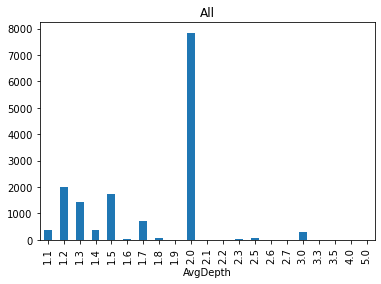

In [49]:
df_groups = df[(df.AvgDepth>1)].groupby('AvgDepth')['AvgDepth'].count()
df_groups.plot(kind='bar', title='All');

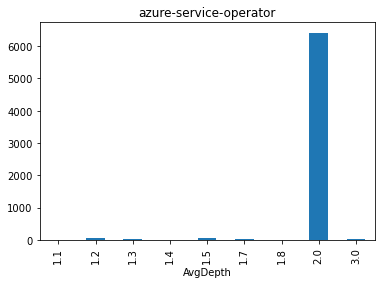

In [50]:
df_groups = df[(df.AvgDepth>1) & (df.Source=='azure-service-operator')].groupby('AvgDepth')['AvgDepth'].count()
df_groups.plot(kind='bar', title='azure-service-operator');

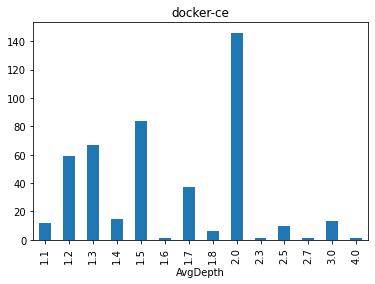

In [51]:
df_groups = df[(df.AvgDepth>1) & (df.Source=='docker-ce')].groupby('AvgDepth')['AvgDepth'].count()
df_groups.plot(kind='bar', title='docker-ce');

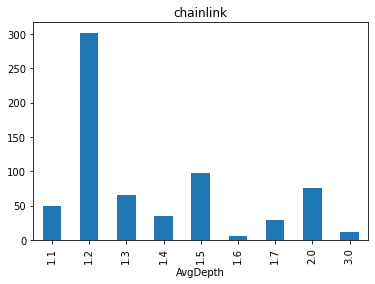

In [52]:
df_groups = df[(df.AvgDepth>1) & (df.Source=='chainlink')].groupby('AvgDepth')['AvgDepth'].count()
df_groups.plot(kind='bar', title='chainlink');

In [53]:
df.groupby('Source')['AvgDepth'].mean().nlargest(100)

Source
azure-service-operator    1.187901
docker-ce                 1.071239
backend                   1.064407
boost                     1.057910
moby                      1.042031
sourcegraph               1.038341
grafana                   1.036551
go-redis                  1.032129
gvisor                    1.029791
go-ethereum               1.029736
kubernetes                1.027858
tidb                      1.026042
chainlink                 1.021893
Name: AvgDepth, dtype: float64

In [54]:
df.groupby('Source')['TotalDepth'].mean().nlargest(100)

Source
boost                     3.121246
chainlink                 3.103785
go-redis                  3.065924
sourcegraph               2.765653
kubernetes                2.737847
grafana                   2.721910
tidb                      2.506315
backend                   2.491749
gvisor                    2.485395
docker-ce                 2.392989
go-ethereum               2.337220
moby                      2.231716
azure-service-operator    1.737481
Name: TotalDepth, dtype: float64

In [55]:
df.sort_values('MxArgsDepth', ascending=False).head(15)

,Source,Name,ArgsDepth,ArgsCnt,∑ArgsDepth,MxArgsDepth,ReturnsDepth,Return,∑ReturnsDepth,MxReturnsDepth,TotalDepth,AvgDepth,Receiver,Args,Path
357474,sourcegraph,Update,"[1, 1, 5]",3,7,5,"[1, 1]",2,2,1,9,1.8,UserSCIMService,"[context.Context, string, anon_func_title]",\internal\scim\user_service.json
360358,sourcegraph,PushHook,[5],1,5,5,[],0,0,0,5,5.0,S3APIDeleteObjectsFunc,[anon_func_title],\internal\uploadstore\mocks_test.json
298162,kubernetes,MakeMatcher,[5],1,5,5,[1],1,1,1,6,3.0,,[anon_func_title],\test\e2e\framework\expect.json
366250,tidb,RestoreMetaKVFilesWithBatchMethod,"[1, 1, 1, 1, 3, 2, 5]",7,14,5,[1],1,1,1,15,1.9,Client,"[context.Context, backuppb.DataFileInfo, backu...",\br\pkg\restore\client.json
140064,chainlink,UpdateJobProposalSpecDefinition,"[1, 5]",2,6,5,"[1, 1]",2,2,1,8,2.0,Resolver,"[context.Context, anon_struct]",\core\web\resolver\mutation.json
140066,chainlink,SetSQLLogging,"[1, 5]",2,6,5,"[1, 1]",2,2,1,8,2.0,Resolver,"[context.Context, anon_struct]",\core\web\resolver\mutation.json
140067,chainlink,CreateAPIToken,"[1, 5]",2,6,5,"[1, 1]",2,2,1,8,2.0,Resolver,"[context.Context, anon_struct]",\core\web\resolver\mutation.json
140068,chainlink,DeleteAPIToken,"[1, 5]",2,6,5,"[1, 1]",2,2,1,8,2.0,Resolver,"[context.Context, anon_struct]",\core\web\resolver\mutation.json
140069,chainlink,CreateJob,"[1, 5]",2,6,5,"[1, 1]",2,2,1,8,2.0,Resolver,"[context.Context, anon_struct]",\core\web\resolver\mutation.json
190231,gvisor,benchmarkSendRecv,"[1, 5]",2,6,5,[],0,0,0,6,3.0,,"[testing.B, anon_func_title]",\pkg\p9\client_test.json


In [56]:
stats = {}

In [57]:
for index, row in df.iterrows():
    for x in row['ArgsDepth']:
        if x not in stats:
            stats[x] = 1
        else:
            stats[x]+=1
    for x in row['ReturnsDepth']:
        if x not in stats:
            stats[x] = 1
        else:
            stats[x]+=1

In [58]:
stats

{1: 414470, 3: 3334, 2: 12680, 5: 17, 6: 2, 4: 90}

In [59]:
df['FullPath'] = df['Path']+df['Name']

In [60]:
df['ArgsAndReturns'] = df['ArgsCnt']+df['Return']

In [61]:
df

,Source,Name,ArgsDepth,ArgsCnt,∑ArgsDepth,MxArgsDepth,ReturnsDepth,Return,∑ReturnsDepth,MxReturnsDepth,TotalDepth,AvgDepth,Receiver,Args,Path,FullPath,ArgsAndReturns
47,azure-service-operator,ValidateAzureSQLDBName,[1],1,1,1,[1],1,1,1,2,1.0,,[string],\api\v1alpha1\azuresqluser_webhook.json,\api\v1alpha1\azuresqluser_webhook.jsonValidat...,2
68,azure-service-operator,getStashedAnnotation,"[1, 1]",2,2,1,"[1, 1]",2,2,1,4,1.0,,"[metav1.ObjectMeta, anon_interface]",\api\v1alpha1\conversion_stash.json,\api\v1alpha1\conversion_stash.jsongetStashedA...,4
69,azure-service-operator,setStashedAnnotation,"[1, 1]",2,2,1,[1],1,1,1,3,1.0,,"[metav1.ObjectMeta, anon_interface]",\api\v1alpha1\conversion_stash.json,\api\v1alpha1\conversion_stash.jsonsetStashedA...,3
70,azure-service-operator,clearStashedAnnotation,[1],1,1,1,[],0,0,0,1,1.0,,[metav1.ObjectMeta],\api\v1alpha1\conversion_stash.json,\api\v1alpha1\conversion_stash.jsonclearStashe...,1
122,azure-service-operator,AddFinalizer,[1],1,1,1,[],0,0,0,1,1.0,ResourceGroup,[string],\api\v1alpha1\resourcegroup_types.json,\api\v1alpha1\resourcegroup_types.jsonAddFinal...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399848,tidb,main,[],0,0,0,[],0,0,0,0,NaN,,[],\tools\tazel\main.json,\tools\tazel\main.jsonmain,0
399849,tidb,write,"[1, 1]",2,2,1,[1],1,1,1,3,1.0,,"[string, build.File]",\tools\tazel\util.json,\tools\tazel\util.jsonwrite,3
399850,tidb,skipFlaky,[1],1,1,1,[1],1,1,1,2,1.0,,[string],\tools\tazel\util.json,\tools\tazel\util.jsonskipFlaky,2
399851,tidb,skipTazel,[1],1,1,1,[1],1,1,1,2,1.0,,[string],\tools\tazel\util.json,\tools\tazel\util.jsonskipTazel,2


In [62]:
sum(df.groupby('Source')['FullPath'].count())

181633

In [63]:
df.groupby('Source')['ArgsAndReturns'].sum()

Source
azure-service-operator     53659
backend                      695
boost                       5234
chainlink                  37527
docker-ce                   9632
go-ethereum                18767
go-redis                    3232
grafana                    26141
gvisor                     27078
kubernetes                115550
moby                       18072
sourcegraph                50629
tidb                       64377
Name: ArgsAndReturns, dtype: int64

In [68]:
df['AvgDepth']=df['AvgDepth'].fillna(0)
df.groupby('Source')['AvgDepth'].mean()

Source
azure-service-operator    1.187320
backend                   1.036304
boost                     1.049518
chainlink                 1.011420
docker-ce                 1.059133
go-ethereum               1.007081
go-redis                  0.981337
grafana                   1.025632
gvisor                    0.979107
kubernetes                1.019254
moby                      1.024566
sourcegraph               1.027451
tidb                      0.999580
Name: AvgDepth, dtype: float64